In [68]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style

In [69]:
style.use('ggplot')

In [70]:
df = quandl.get('WIKI/GOOGL')

In [71]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [72]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Close'] * 100

In [73]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

In [74]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

In [75]:
forecast_out = int(math.ceil(0.01*len(df)))

In [76]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [77]:
X = np.array(df.drop(['label'], 1))

In [78]:
X = preprocessing.scale(X)

In [79]:
X = X[:-forecast_out]

In [80]:
X_lately = X[-forecast_out:]

In [81]:
df.dropna(inplace=True)

In [82]:
y = np.array(df['label'])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [84]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [85]:
forecast_set = clf.predict(X_lately)

In [86]:
print(forecast_set, accuracy, forecast_out)

[1077.12544207 1091.20139063 1104.73555489 1099.85056293 1093.5212481
 1091.41079704 1090.11250097 1086.2033597  1080.49702588 1075.99257864
 1074.23430416 1091.78550374 1110.36142331 1116.40507146 1130.80156905
 1135.19382409 1133.54399747 1131.15891861 1132.94634556 1149.81110056
 1149.96175345 1159.43637132 1156.2212414  1164.46371585 1183.63689174
 1197.38870362 1191.35675083 1203.29161227 1207.82492159 1207.54093699
 1198.32788018 1203.16883024 1201.76820828 1137.54218531 1081.69973971] 0.9789175409022332 35


In [87]:
df['Forecast'] = np.nan

In [88]:
last_date = df.iloc[-1].name

In [89]:
last_unix = last_date.timestamp()

In [90]:
one_day = 86400

In [91]:
next_unix = last_unix + one_day

In [93]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]
    

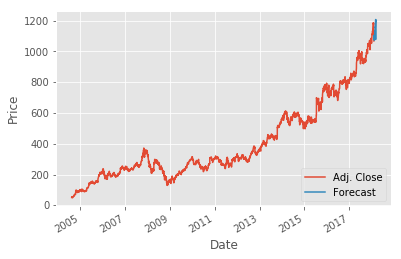

In [98]:
df['Adj. Close'].plot();
df['Forecast'].plot();
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()